# Классификация текстов

В этом задании представлено решение задачи классификации текстов по авторству. Всего 8 разных авторов.

Скачивание различных датасетов и библиотек:

In [ ]:
!wget -O train_authors.csv https://raw.githubusercontent.com/MSUcourses/Data-Analysis-with-Python/main/Deep%20Learning/Files/train_authors_new.csv

--2025-01-31 12:13:42--  https://raw.githubusercontent.com/MSUcourses/Data-Analysis-with-Python/main/Deep%20Learning/Files/train_authors_new.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5163531 (4.9M) [text/plain]
Saving to: ‘train_authors.csv’

train_authors.csv   100%[===================>]   4.92M  --.-KB/s    in 0.07s   

2025-01-31 12:13:42 (73.2 MB/s) - ‘train_authors.csv’ saved [5163531/5163531]



In [ ]:
!wget -O test_authors.csv https://raw.githubusercontent.com/MSUcourses/Data-Analysis-with-Python/main/Deep%20Learning/Files/test_authors_new.csv

--2025-01-31 12:13:42--  https://raw.githubusercontent.com/MSUcourses/Data-Analysis-with-Python/main/Deep%20Learning/Files/test_authors_new.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 961703 (939K) [text/plain]
Saving to: ‘test_authors.csv’

test_authors.csv    100%[===================>] 939.16K  --.-KB/s    in 0.04s   

2025-01-31 12:13:43 (22.1 MB/s) - ‘test_authors.csv’ saved [961703/961703]



In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import nltk
from tqdm import tqdm_notebook
import torch.nn as nn                                                             # тут все блоки нейронных сетей, слои
import torch.nn.functional as F

from collections import Counter
from typing import List
import string

import seaborn
seaborn.set(palette='summer')

# скачиваем нужный пакет данных для работы библиотеки nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
!pip install --upgrade torch sympy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Подготовка данных

Загрузка датасета и демонстрация данных:

In [ ]:
# Посмотрим на датасет
import pandas as pd
train_data = pd.read_csv('train_authors.csv')
train_data.head()

,text,author
0,"Студент, который все это нам рассказал, прилет...",Bulychev
1,"-Что не укладывается в голове,- произнес отец ...",Pratchett
2,"-Ш-ш-ш,- сказал я.- Спи.\n-Не могу,- ответила ...",King
3,-В Севастополь? Новое задание имеет отношение ...,Akunin
4,"-Ты прав,- сказал Сева.- Даже если это космиче...",Bulychev


In [ ]:
# Здесь поле 'text' — это текст, а 'author' — автор текста. 'author' — это целевая переменная, которую будет предсказывать нейросеть.
test_data = pd.read_csv('test_authors.csv')
test_data.head()

# Заведем словарь соответствия имени автора его номеру:
writers = ['Akunin', 'Bulychev', 'Chehov', 'Dostoevsky', 'Gogol', 'King',
       'Pratchett', 'Remark']
writers_to_label = {writer: i for i, writer in enumerate(writers)}
label_to_writers = {i: writer for i, writer in enumerate(writers)}

# Завдем также датасет
dataset = {}

dataset['train'] = [{'text':text, 'author':writers_to_label[label]} \
              for text, label in zip(np.array(train_data['text']), np.array(train_data['author']))]

dataset['test'] = [{'text':text, 'author': 0}         # зададим для удобства всем текстам author=0
              for text in np.array(test_data['text'])]

Ваша задача — обучить RNN-модель на тренировочных данных и получить максимальное возможное accuracy на тестовой части данных. За основу можно взять код с занятия. **Обратите внимание, что здесь у нас задача классификации на 8 классов, а не на 2, как было на занятии.**

Чтобы улучшить качество базовой модели, можно попробовать различные идеи экспериментов. Вот несколько идей:
* **Модель RNN**. Попробуйте LSTM и GRU. Мы советуем обратить внимание на [GRU](https://pytorch.org/docs/stable/generated/torch.nn.GRU.html), так как интерфейс этого класса ничем не отличается от обычной Vanilla RNN, которую мы использовали на семинаре.
* **Увеличение количества рекуррентных слоев модели**. Это можно сделать с помощью параметра `num_layers` в классе `nn.RNN`. В такой модели выходы первой RNN передаются в качестве входов второй RNN и так далее.
* **Изменение вида агрреграции выхода RNN**. В семинаре мы пробовали аггрегировать выходы RNN с помощью max, mean и получения последнего выхода. Можно попробовать другие варианты. Например, конкатенировать результат агрегации и эмбеддинг с последнего токена.
* **Подбор гиперпараметров и обучение до сходимости**. Можно, например, увеличить количество эпох обучения нейросети, а также попробовать различные гиперпараметры: размер словаря, `dropout_rate`, `hidden_dim`.

## Задание

Ниже приведена функция, необходимая для получения предсказаний обученной модели на основе тестовых данных. Здесь model — обученная модель, dataloader — test_dataloader:

In [ ]:
# функция для обработки предложения
def process_and_tokenize_text(text):
    # приводим к нижнему регистру и убираем пунктуацию
    prccessed_text = text.lower().translate(
        str.maketrans('', '', string.punctuation)
    )
    # токенизируем текст
    tokens = word_tokenize(prccessed_text)
    return tokens

# массивы для хранения токенизированных тренировочных и тестовых данных
train_data = []
test_data = []

# пустой счетчик слов
words = Counter()

# проходимся по текстам обучающего датасета и предобрабатываем их
for example in tqdm_notebook(dataset['train']):
    text = example['text']
    label = example['author']
    text_processed = process_and_tokenize_text(text)
    train_data.append((text_processed, label))

    # увеличиваем счетчик каждого слова в словаре
    for word in text_processed:
        words[word] += 1

# проходимся по текстам тестового датасета и предобрабатываем их
for example in tqdm_notebook(dataset['test']):
    text = example['text']
    label = example['author']
    text_processed = process_and_tokenize_text(text)
    test_data.append((text_processed, label))

# создаем словарь как множество слов
vocab = set(['<unk>', '<bos>', '<eos>', '<pad>'])
# будем добавлять в словарь только те слова, которые
# встречались в обучающих данных не менее 25 раз
counter_threshold = 25

# пополняем словарь словами из words
for char, cnt in words.items():
    if cnt > counter_threshold:
        vocab.add(char)

word2ind = {token: i for i, token in enumerate(vocab)}
ind2word = {i: token for token, i in word2ind.items()}

<ipython-input-8-c7f4f5466885>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for example in tqdm_notebook(dataset['train']):


  0%|          | 0/1734 [00:00<?, ?it/s]

<ipython-input-8-c7f4f5466885>:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for example in tqdm_notebook(dataset['test']):


  0%|          | 0/330 [00:00<?, ?it/s]

In [ ]:
def collate_fn_with_padding(input_batch, max_len=256):
    # input_batch — батч пар (токенизированный текст, label)
    texts = [x[0] for x in input_batch]
    labels = [x[1] for x in input_batch]
    # для каждого элемента батча получаем длину токенизированного текста в токенах
    seq_lens = [len(x) for x in texts]
    # определяем максимальную длину элементов в текущем батче
    max_seq_len = min(max(seq_lens), max_len)

    # проходимся по элементам батча и заменяем токены на их индексы из словаря
    # также последовательности короче max_seq_len дополняем токенами <pad>
    processed_texts = []
    for text, label in zip(texts, labels):
        text = text[:max_seq_len]
        text = [word2ind[x] if x in vocab else word2ind['<unk>'] for x in text]
        for _ in range(max_seq_len - len(text)):
            text.append(word2ind['<pad>'])

        processed_texts.append(text)

    # переводим элементы батча в форматы тензоров
    processed_texts = torch.LongTensor(processed_texts).to(device)
    labels = torch.LongTensor(labels).to(device)

    # собираем батч
    processed_batch = {
        'input_ids': processed_texts,
        'label': labels
    }

    return processed_batch

# поделим тестовые данные на val и test
np.random.seed(42)
num = int(len(train_data) * 0.2)
val_indices = np.random.choice(np.arange(len(train_data)), num)
test_indices = [x for x in range(len(train_data)) if x not in val_indices]
val_data = [train_data[i] for i in val_indices]
train_data = [train_data[i] for i in test_indices]

# заводим даталоадеры
batch_size = 64
train_dataloader = DataLoader(
    train_data, shuffle=True, collate_fn=collate_fn_with_padding, batch_size=batch_size)

val_dataloader = DataLoader(
    val_data, shuffle=False, collate_fn=collate_fn_with_padding, batch_size=batch_size)

test_dataloader = DataLoader(
    test_data, shuffle=False, collate_fn=collate_fn_with_padding, batch_size=len(test_data))

In [ ]:
def evaluate(model, dataloader):
    """
    Calculate accuracy on data from dataloader.
    """

    predictions = []
    target = []
    with torch.no_grad():
        for batch in tqdm_notebook(dataloader,
                                   desc=f'Evaluating'):
            logits = model(batch['input_ids'])
            predictions.append(logits.argmax(dim=1))
            target.append(batch['label'])

    predictions = torch.cat(predictions)
    target = torch.cat(target)
    accuracy = (predictions == target).float().mean().item()

    return accuracy

def train(model, optimizer, criterion, num_epoch=5, eval_steps=100):

    losses = []
    accs_train = []
    accs_val = []

    for epoch in range(num_epoch):
        epoch_losses = []
        model.train()
        for i, batch in enumerate(tqdm_notebook(train_dataloader,
                                                desc=f'Training epoch {epoch}:')):
            optimizer.zero_grad()
            logits = model(batch['input_ids'])
            loss = criterion(logits, batch['label'])
            loss.backward()
            optimizer.step()

            epoch_losses.append(loss.item())
            if i % eval_steps == 0:
                model.eval()
                accs_train.append(evaluate(model, train_dataloader))
                accs_val.append(evaluate(model, val_dataloader))
                model.train()

        losses.append(sum(epoch_losses) / len(epoch_losses))

        losses_type[aggregation_type] = losses
        accs_train_type[aggregation_type] = accs_train
        accs_val_type[aggregation_type] = accs_val

        # for aggregation_type in ['max', 'mean', 'last']:
        plt.plot(losses_type[aggregation_type])
        plt.title('Losses')
        # plt.legend(['max', 'mean', 'last'])
        plt.show()

        # for aggregation_type in ['max', 'mean', 'last']:
        plt.plot(accs_train_type[aggregation_type])
        plt.title('Train accs')
        # plt.legend(['max', 'mean', 'last'])
        plt.show()

        # for aggregation_type in ['max', 'mean', 'last']:
        plt.plot(accs_val_type[aggregation_type])
        plt.title('Val accs')
        # plt.legend(['max', 'mean', 'last'])
        plt.show()

    return losses, accs_train, accs_val

In [ ]:
class SimpleRNN(nn.Module):
    def __init__(
        self, hidden_dim, vocab_size, num_classes, num_layers, dropout,
        aggregation_type: str,
        ):
        super(SimpleRNN, self).__init__()
        # слой эмбеддинга
        self.embedding = nn.Embedding(vocab_size, hidden_dim)
        # рекуррентный слой
        # self.rnn = nn.RNN(hidden_dim, hidden_dim, batch_first=True)
        self.gru = nn.GRU(hidden_dim, hidden_dim, batch_first=True)

        # два полносвязных слоя
        self.fc1 = nn.Linear(hidden_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)

        # слой дропаут
        self.dropout = nn.Dropout(p=dropout)

        self.batch_norm = nn.BatchNorm1d(hidden_dim)

        # каким образом выходы RNN-слоя для разных моментов времени будут
        # агрегироваться перед подачей дальше на вход полносвязному слою
        self.aggregation_type = aggregation_type

    def forward(self, input_batch) -> torch.Tensor:
        embeddings = self.embedding(input_batch)  # [batch_size, seq_len, hidden_dim]
        output, _ = self.gru(embeddings)          # [batch_size, seq_len, hidden_dim]

        if self.aggregation_type == 'max':
            output = output.max(dim=1)[0]         #[batch_size, hidden_dim]
        elif self.aggregation_type == 'mean':
            output = output.mean(dim=1)           #[batch_size, hidden_dim]
        elif self.aggregation_type == 'last':
            output = output[:, -1, :]
        else:
            raise ValueError("Invalid aggregation_type")

        output = self.batch_norm(output)
        output = F.tanh(self.dropout(self.fc1(output)))   # [batch_size, hidden_dim]
        output = self.fc2(output)                         # [batch_size, num_classes]

        return output

<ipython-input-10-144a7b072ca8>:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate(tqdm_notebook(train_dataloader,


Training epoch 0::   0%|          | 0/23 [00:00<?, ?it/s]

<ipython-input-10-144a7b072ca8>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm_notebook(dataloader,


Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

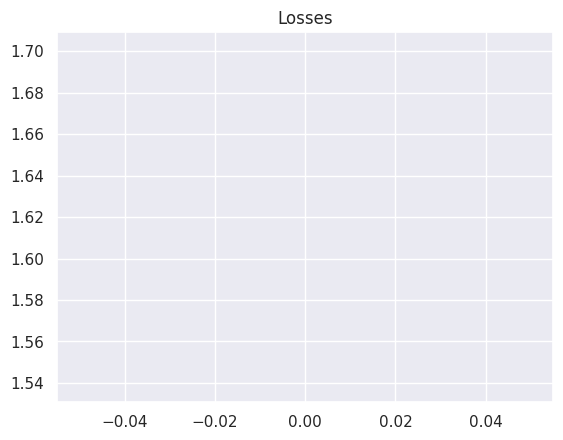

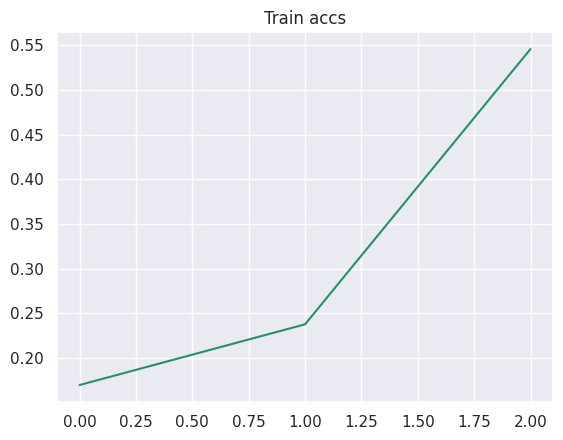

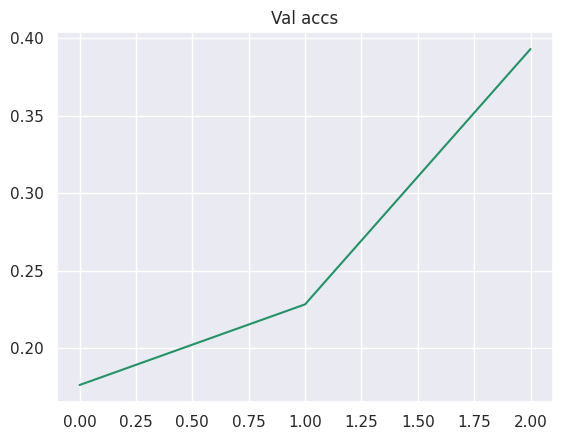

Training epoch 1::   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

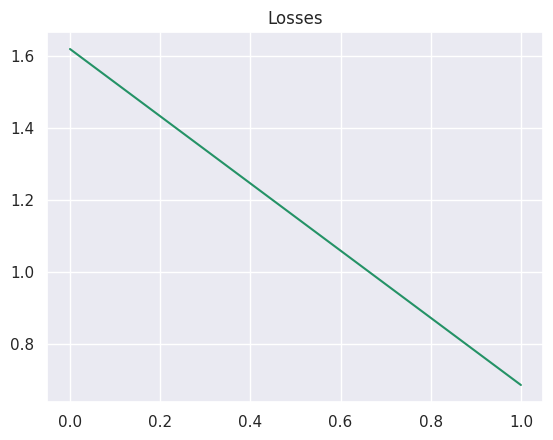

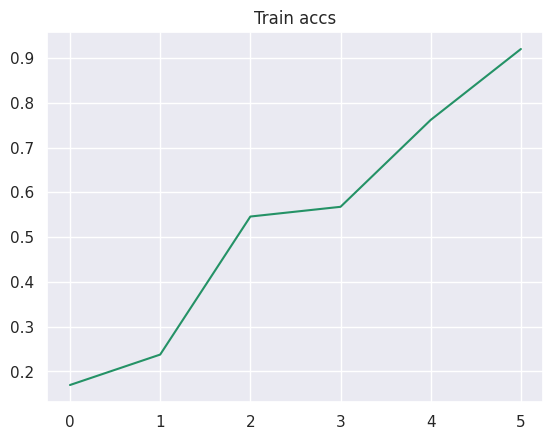

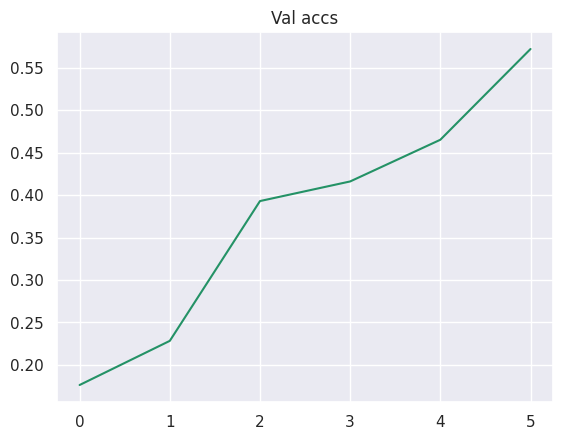

Training epoch 2::   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

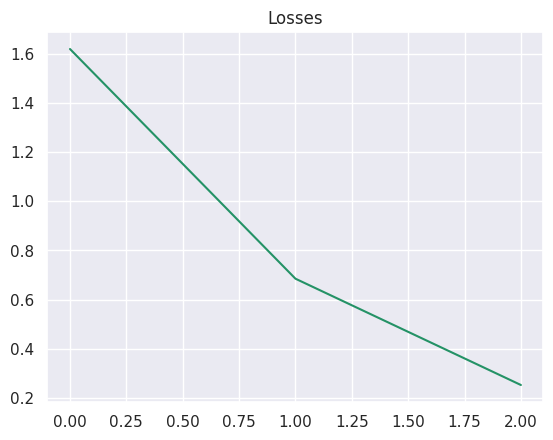

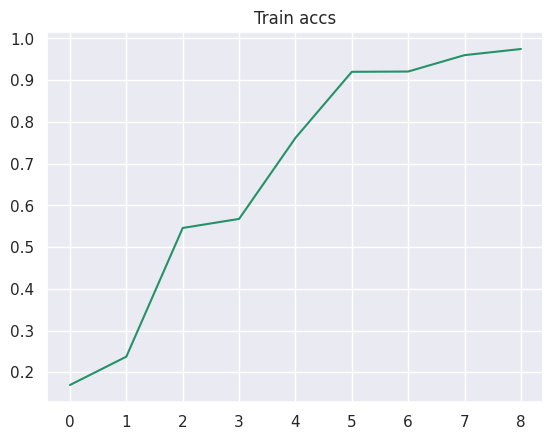

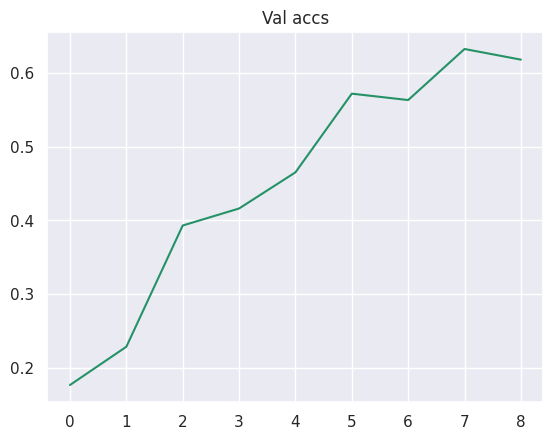

Training epoch 3::   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

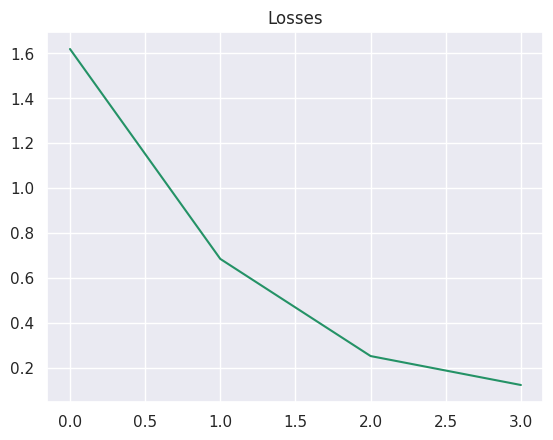

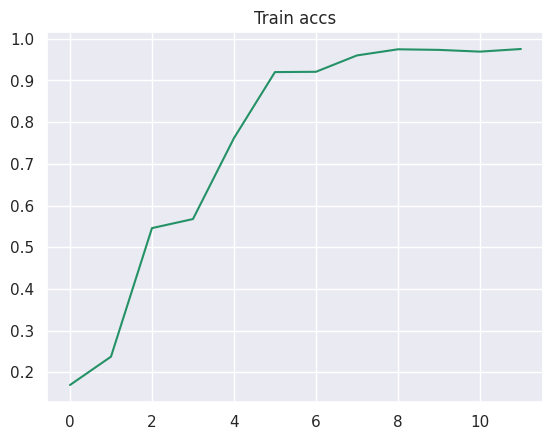

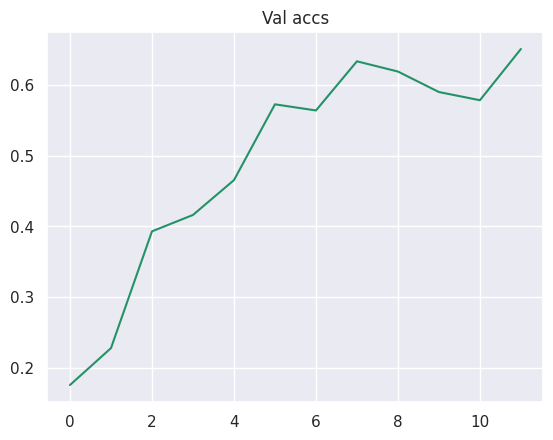

Training epoch 4::   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

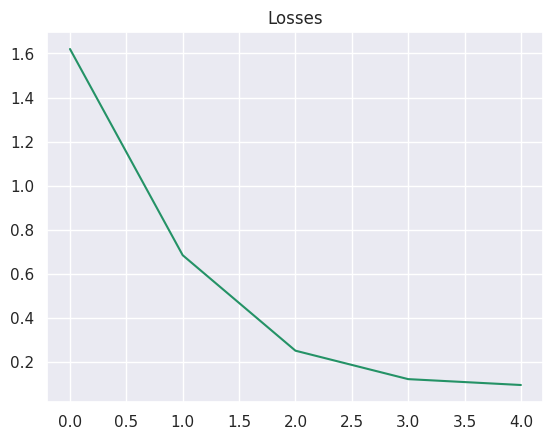

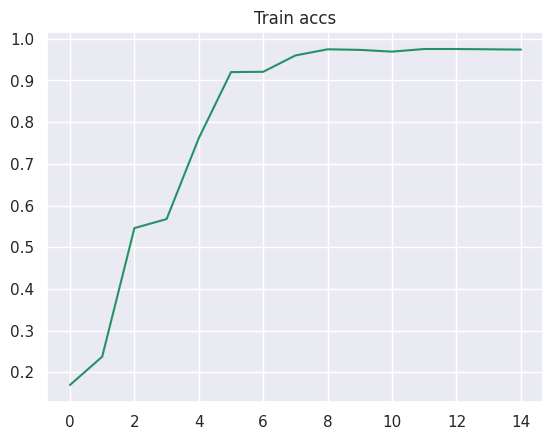

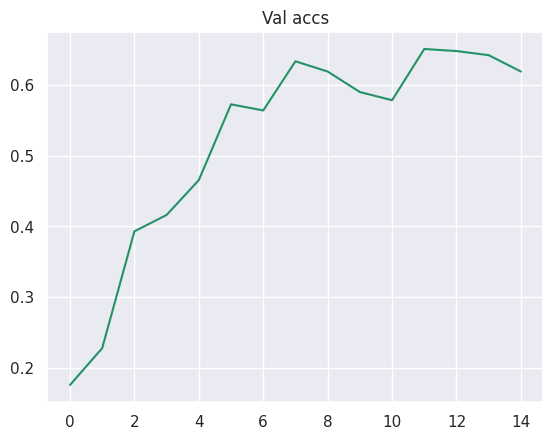

Training epoch 5::   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

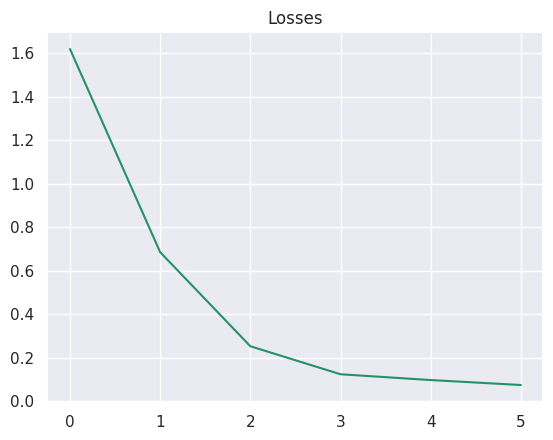

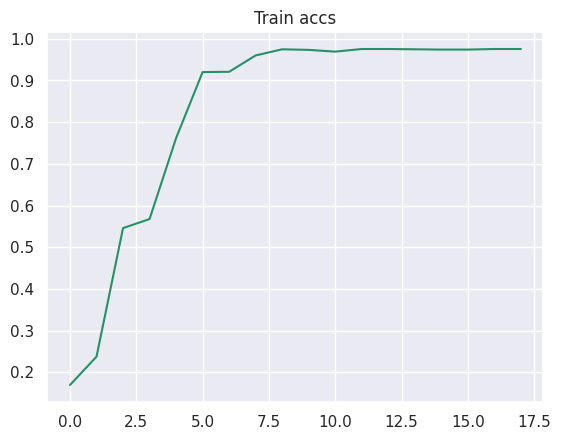

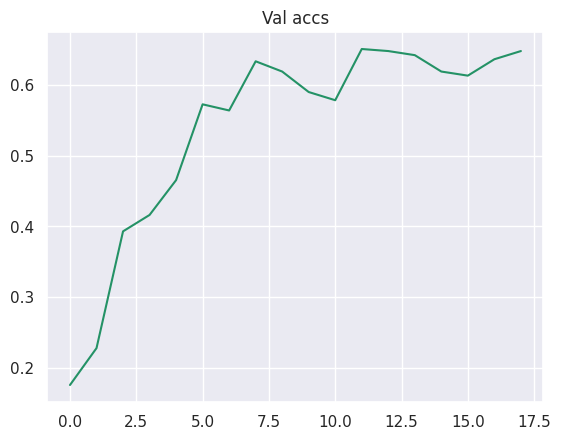

Training epoch 6::   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

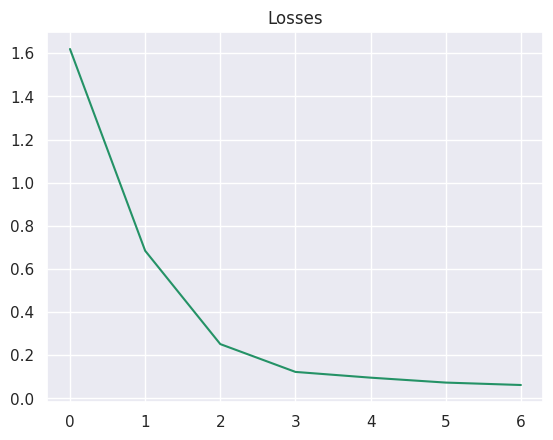

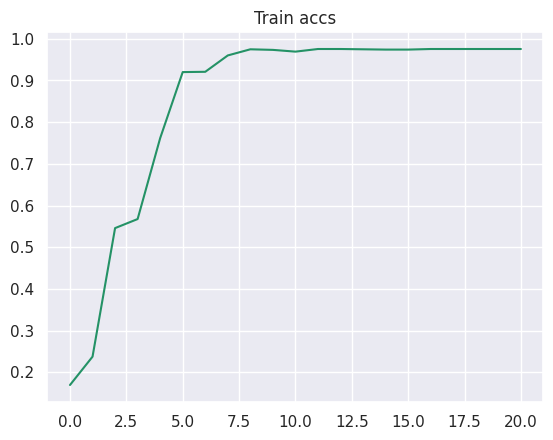

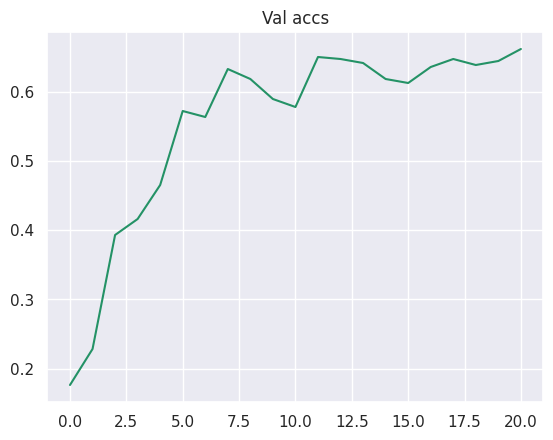

Training epoch 7::   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

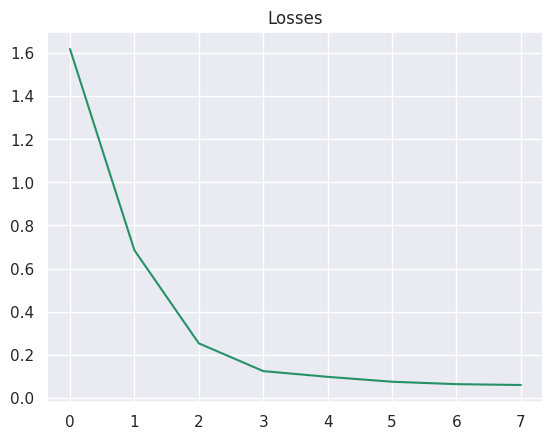

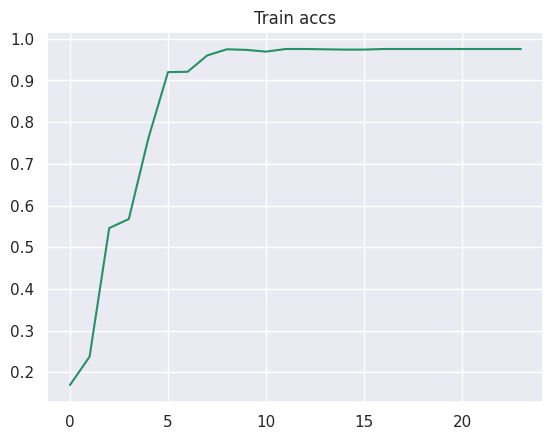

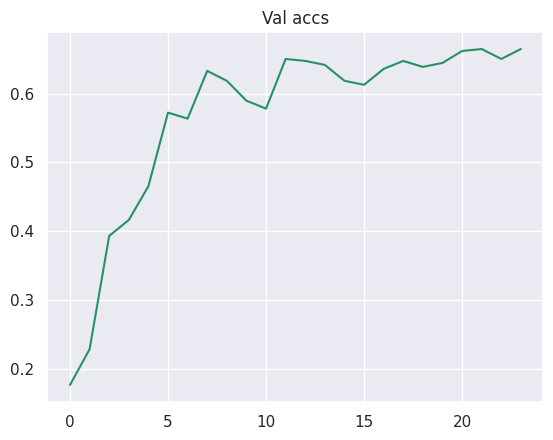

Training epoch 8::   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

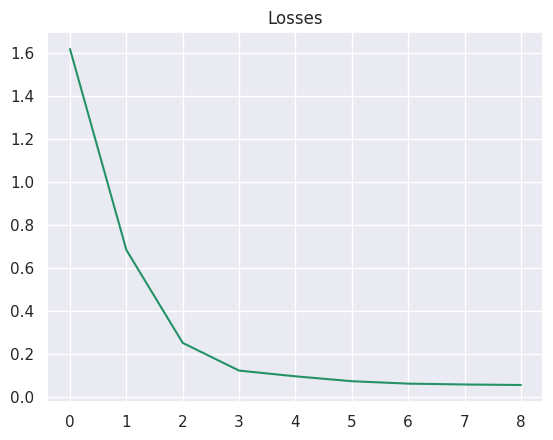

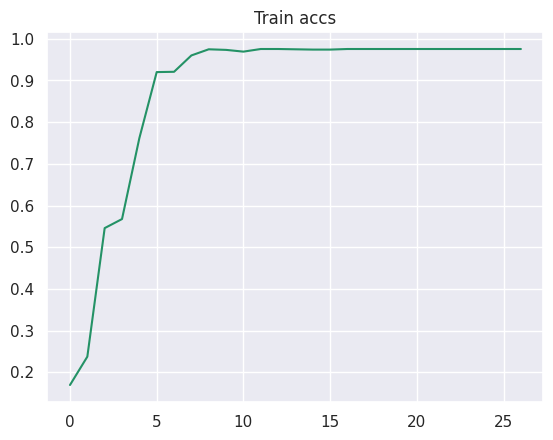

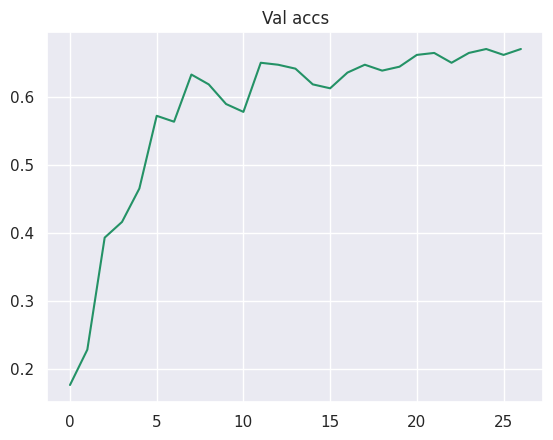

Training epoch 9::   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

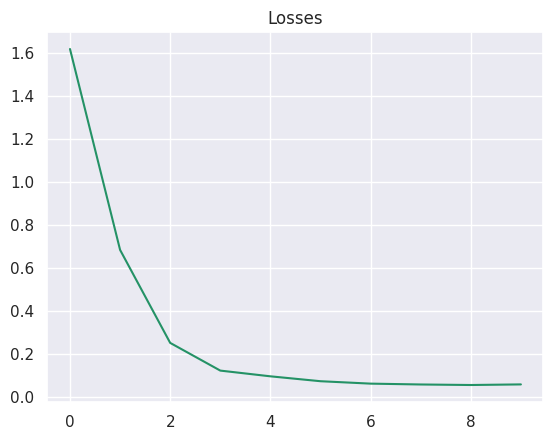

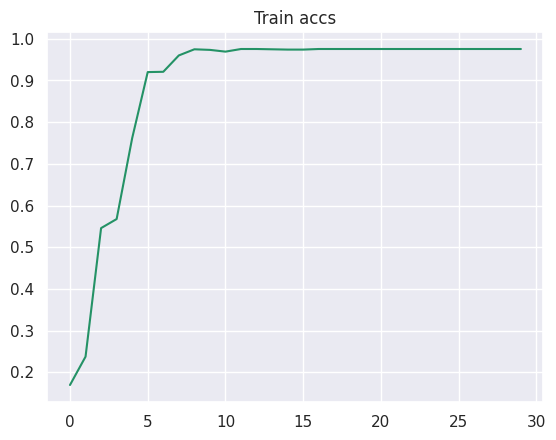

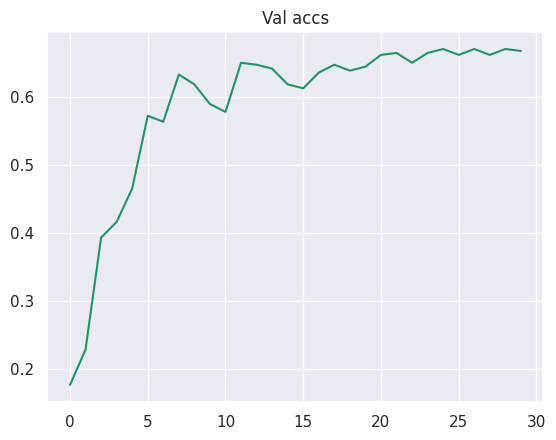

Training epoch 10::   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

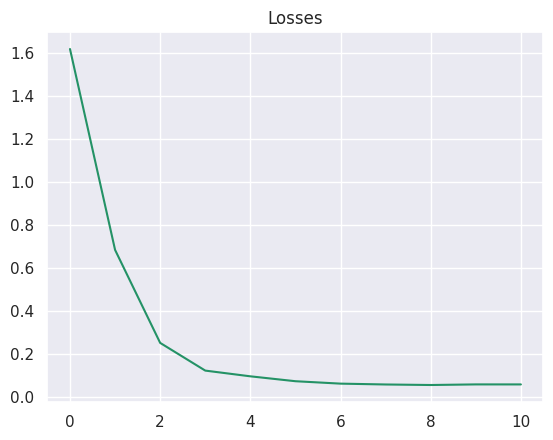

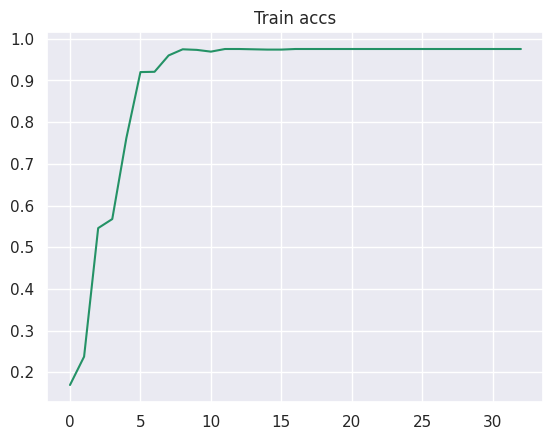

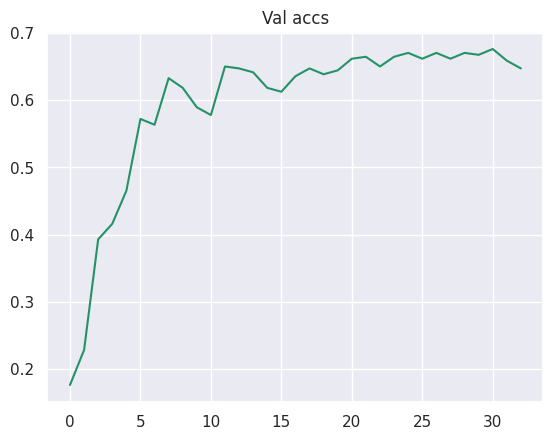

Training epoch 11::   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

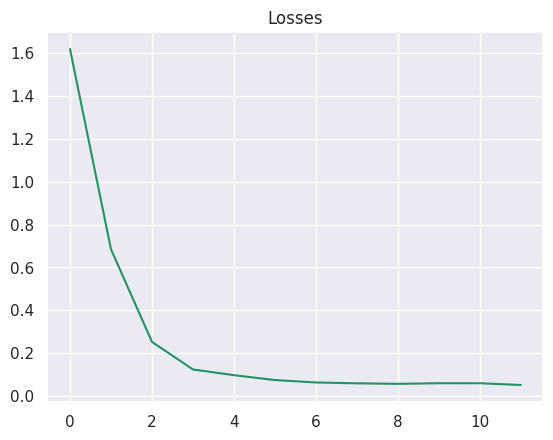

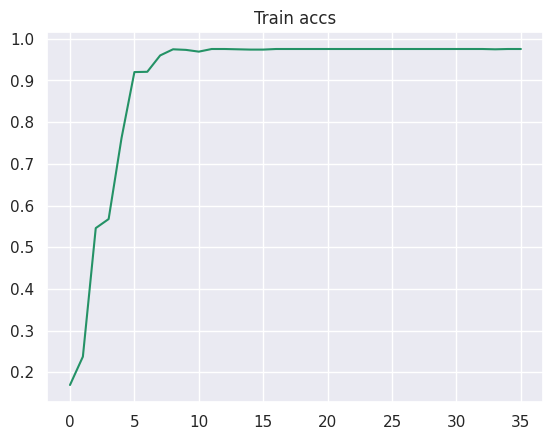

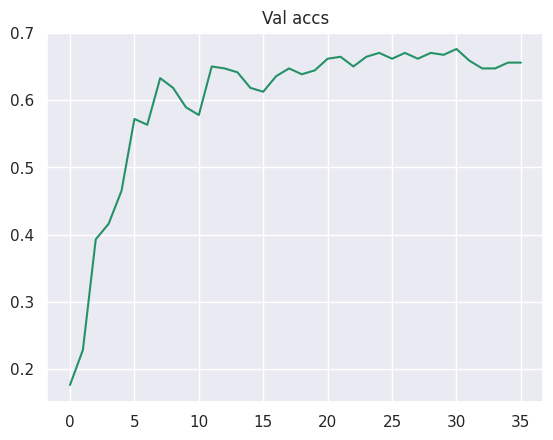

Training epoch 12::   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

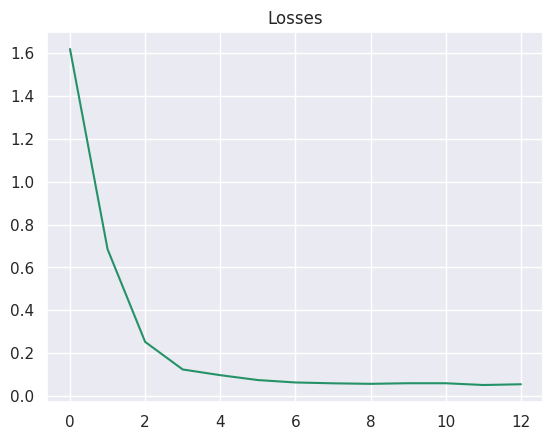

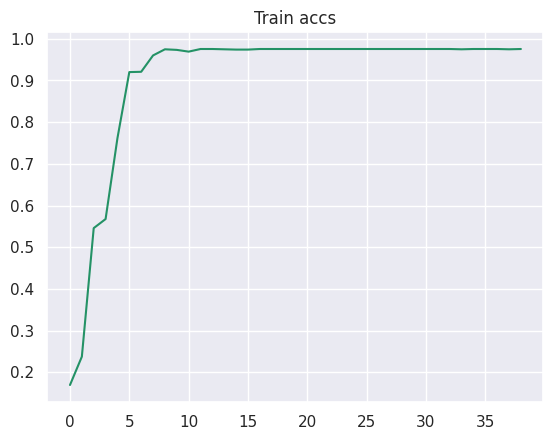

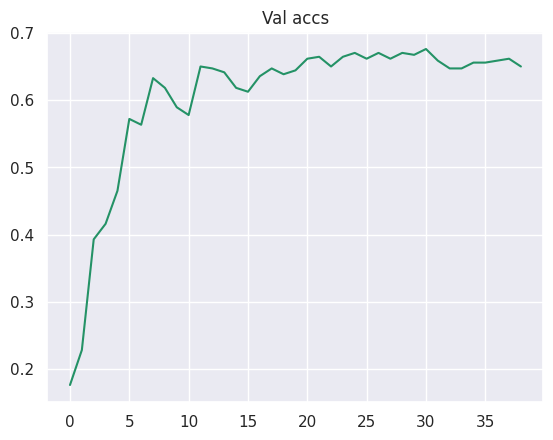

Training epoch 13::   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

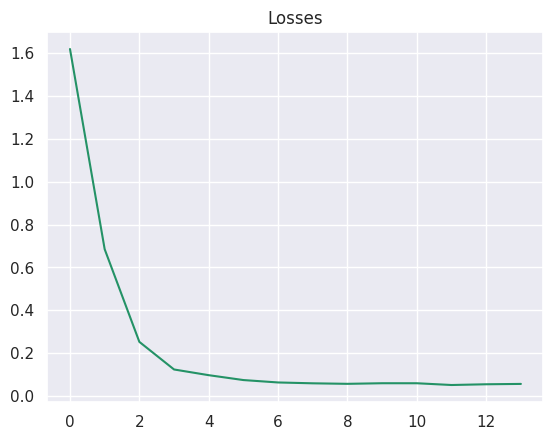

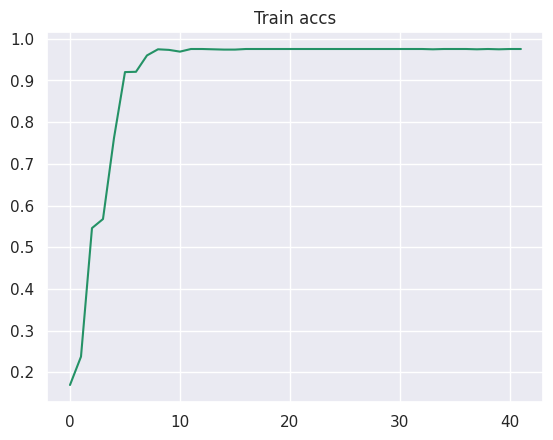

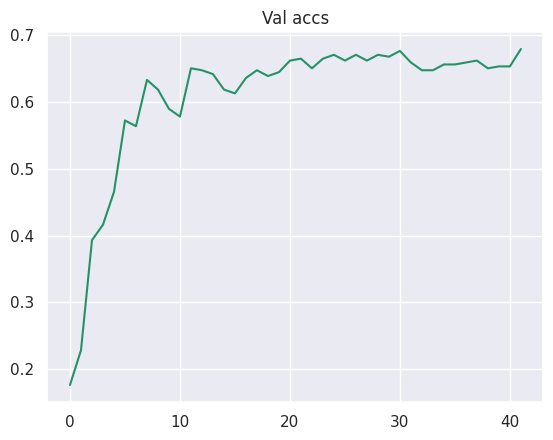

Training epoch 14::   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

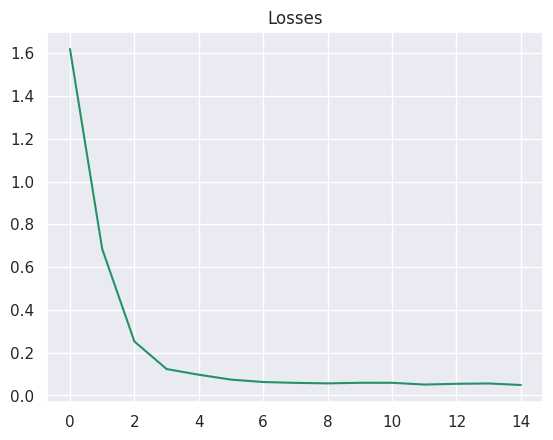

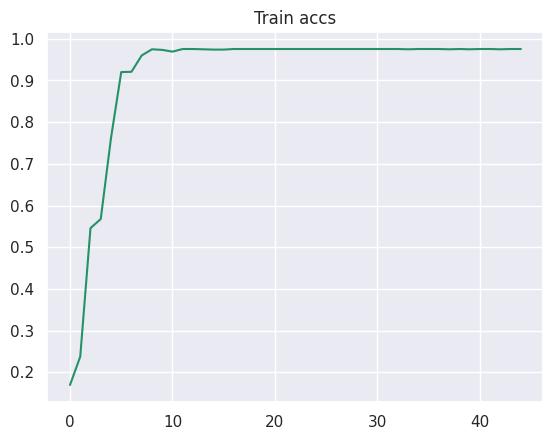

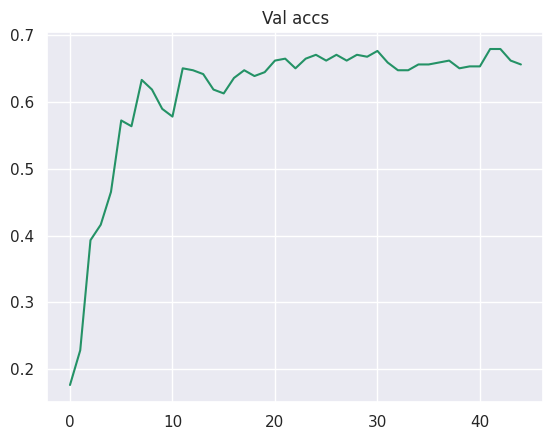

In [ ]:
num_epoch = 15
eval_steps = len(train_dataloader) // 2
aggregation_type = 'max'
hidden_dim = 720
dropout = 0.3
num_layers = 5


losses_type = {}
accs_train_type = {}
accs_val_type = {}

# for aggregation_type in ['max', 'mean', 'last']:
# print(f"Starting training for {aggregation_type}")
losses = []
acc = []

model = SimpleRNN(hidden_dim=hidden_dim,
                  vocab_size=len(vocab),
                  num_classes=8,
                  num_layers=num_layers,
                  dropout=dropout,
                  aggregation_type=aggregation_type
                  ).to(device)

criterion = nn.CrossEntropyLoss(ignore_index=word2ind['<pad>'])
optimizer = torch.optim.Adam(model.parameters())

losses, accs_train, accs_val = train(model,
                                      optimizer,
                                      criterion,
                                      num_epoch=num_epoch,
                                      eval_steps=len(train_dataloader) // 2)

Итоговая точность на валидационной выборке составила в среднем:

In [ ]:
final_accuracy = sum(accs_val[-11:-1]) / 10
final_accuracy

0.6609826385974884